<a href="https://colab.research.google.com/github/pabloac31/TFG/blob/master/cifar10_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/pabloac31/TFG.git
%cd TFG

Cloning into 'TFG'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 154 (delta 69), reused 40 (delta 18), pack-reused 41
Receiving objects: 100% (154/154), 79.15 MiB | 10.84 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/TFG


In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
from cifar10_models import *
from utils import *
from adversarial_attacks import *

In [0]:
iv3 = inception_v3(pretrained=True)

In [5]:
# Define what device we are using
use_cuda=True
print("CUDA Available: ",torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

CUDA Available:  True


In [0]:
test_loader = testloader_cifar10('./data', 256, shuffle=False)

Files already downloaded and verified


In [0]:
test_model(iv3, device, test_loader)

100%|██████████| 40/40 [00:21<00:00,  1.83it/s]


0.9541

In [6]:
adv_loader = testloader_cifar10('./data', 1)
univ_loader = testloader_cifar10('./data', 1, shuffle=False)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
test_fgsm(iv3, device, './data/img1.png', 0.56)


  0%|          | 0/10000 [00:00<?, ?it/s]

Target Probability [Iteration 0]: 0.9996024966239929
Target Probability [Iteration 1]: 0.9996024966239929
Target Probability [Iteration 2]: 0.9996024966239929
Target Probability [Iteration 3]: 0.9996024966239929
Target Probability [Iteration 4]: 0.9996024966239929
Target Probability [Iteration 5]: 0.9996024966239929
Target Probability [Iteration 6]: 0.9996024966239929
Target Probability [Iteration 7]: 0.9996024966239929
Target Probability [Iteration 8]: 0.9996024966239929
Target Probability [Iteration 9]: 0.9996024966239929



  0%|          | 1/10000 [00:30<83:52:45, 30.20s/it]

Target Probability [Iteration 0]: 0.0785045251250267



  0%|          | 2/10000 [00:35<63:19:08, 22.80s/it]


======== RESULTS ========
Test Accuracy = 1 / 2 = 0.5
Average confidence = 0.9799618124961853
Average time = 17.799294590950012
Average magnitude of perturbations = 4.4680174589157104
Model robustness = 0.048412756994366646


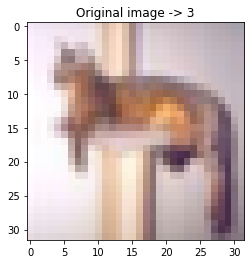

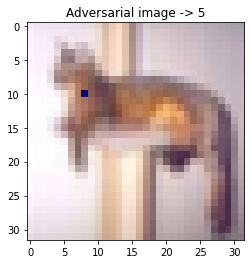

In [15]:
#params = {'epsilon': 0.4}
#params = {'num_classes': 10, 'overshoot': 0.02, 'max_iter': 50, 'lambda_fac': 1.0}
#params = {'lambda_': 3., 'max_iter': 20, 'epsilon': 0.2, 'delta': 255}
params = {'target_label': None, 'iters': 10, 'pop_size': 100, 'verbose': True}
adv_examples = attack_model(iv3, device, adv_loader, 'one_pixel_attack', params, iters=2)

plt.imshow(denormalize_cifar10(adv_examples[0][2]).transpose((1,2,0)))
plt.title('Original image -> ' + str(adv_examples[0][0]))
plt.show()
plt.imshow(denormalize_cifar10(adv_examples[0][3]).transpose((1,2,0)))
plt.title('Adversarial image -> ' + str(adv_examples[0][1]))
plt.show()

In [0]:
v = universal_perturbation(univ_loader, iv3, device, delta=0.1)

plt.imshow(denormalize_cifar10(v[0].cpu().detach().numpy()).transpose((1,2,0)))
plt.title('Universal perturbation')
plt.show()

In [0]:
image = Image.open('./data/img1.png')
x = TF.to_tensor(image)
x = normalize_cifar10(x)
x = x.unsqueeze_(0).to(device)
label = torch.tensor([1]).to(device)
print('Label:', label.item())
x.requires_grad = True
y = iv3(x)
init_pred = y.max(1, keepdim=True)[1]
print("Original image prediction: ", init_pred.item())
x_r = x.add(v).to(device)
pred = iv3(x_r).max(1, keepdim=True)[1]
print("Perturbed image prediction: ", pred.item())

Label: 1
Original image prediction:  1
Perturbed image prediction:  2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


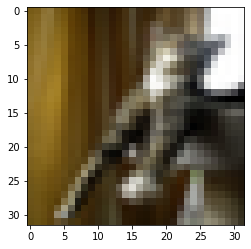

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True
0.012006991542875767


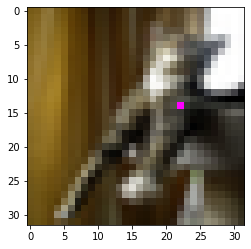

In [0]:
img, label = next(iter(adv_loader))
im = denormalize_cifar10(img.numpy()[0].copy()).transpose((1,2,0))
plt.imshow(im)
plt.show()
label = label.item()
success, sol, score = one_pixel_attack(iv3, device, img, label, pop_size=400, iters=20)
print(success)
print(score)
adv = perturb(sol, img)
im = denormalize_cifar10(adv.numpy()[0].copy()).transpose((1,2,0))
plt.imshow(im)
plt.show()